# Information

For what purpose was the dataset created?

test

Additional Information

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 



I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.)  I lost it, and b.), I would not know which 13 variables are included in the set.



The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash  

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline 



In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.           

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class_names = ['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']
df = pd.read_csv('../datasets/wine.data', header=None, names=class_names)

## Data exploration

In [3]:
df.head()

class  Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23       1.71  2.43               15.6        127   
1      1    13.20       1.78  2.14               11.2        100   
2      1    13.16       2.36  2.67               18.6        101   
3      1    14.37       1.95  2.50               16.8        113   
4      1    13.24       2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  0D280_0D315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

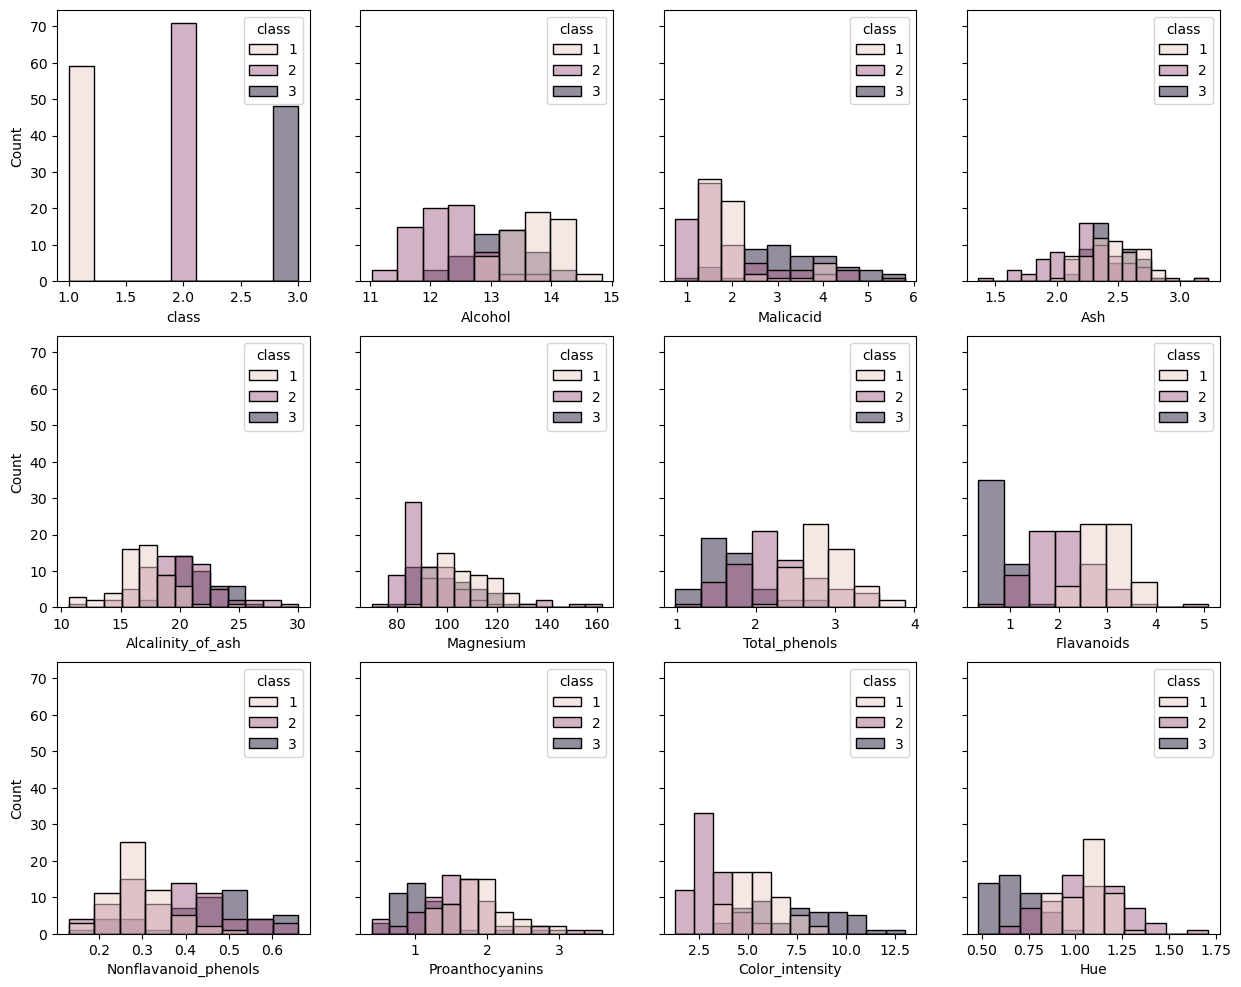

In [4]:
fig, axs = plt.subplots(3,4, figsize = (15, 12), sharey = True)
for name, ax in zip(df.columns,axs.flatten()) :
    sns.histplot(ax = ax, data=df, x = name, hue = 'class')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

In [6]:
df.corr()

class   Alcohol  Malicacid       Ash  \
class                         1.000000 -0.328222   0.437776 -0.049643   
Alcohol                      -0.328222  1.000000   0.094397  0.211545   
Malicacid                     0.437776  0.094397   1.000000  0.164045   
Ash                          -0.049643  0.211545   0.164045  1.000000   
Alcalinity_of_ash             0.517859 -0.310235   0.288500  0.443367   
Magnesium                    -0.209179  0.270798  -0.054575  0.286587   
Total_phenols                -0.719163  0.289101  -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815  -0.411007  0.115077   
Nonflavanoid_phenols          0.489109 -0.155929   0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698  -0.220746  0.009652   
Color_intensity               0.265668  0.546364   0.248985  0.258887   
Hue                          -0.617369 -0.071747  -0.561296 -0.074667   
0D280_0D315_of_diluted_wines -0.788230  0.072343  -0.368710  0.003911   
Proline                      -0.633717  0.643720  -0.192011  0.223626   

                              Alcalinity_of_ash  Magnesium  Total_phenols  \
class                                  0.517859  -0.209179      -0.719163   
Alcohol                               -0.310235   0.270798       0.289101   
Malicacid                              0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total_phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Color_intensity                        0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
0D280_0D315_of_diluted_wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid_phenols  \
class                          -0.847498              0.489109   
Alcohol                         0.236815             -0.155929   
Malicacid                      -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity_of_ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total_phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid_phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color_intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
0D280_0D315_of_diluted_wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Color_intensity       Hue  \
class                               -0.499130         0.265668 -0.617369   
Alcohol                              0.136698         0.546364 -0.071747   
Malicacid                           -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total_phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins               

## Model

In [7]:
y = df[['class']]
X = df.iloc[:, 1:]

In [8]:
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25)

In [10]:
class_values = df['class'].unique()
# lkhDict = {column : { x : gaussian_kde(X_train[column].loc[y_train['class'] == x]) for x in class_values } for column in X}
lkhDict = { i : gaussian_kde(X_train.loc[y_train['class'] == i].T, bw_method = 'scott')  for i in class_values}
lkhDict

{1: <scipy.stats._kde.gaussian_kde at 0x7ff511ed0e50>,
 2: <scipy.stats._kde.gaussian_kde at 0x7ff5501f5460>,
 3: <scipy.stats._kde.gaussian_kde at 0x7ff54c16e0d0>}

In [11]:
prior = y_train.value_counts(normalize = True)
prior

class
2        0.373239
1        0.338028
3        0.288732
dtype: float64

In [12]:
def evaluate_post (row) :
    return np.argmax([prior[lkh] * lkhDict[lkh].evaluate(row) for lkh in lkhDict])+1

In [13]:
result = pd.DataFrame()
result['target'] = y_test
result['predicted'] = X_test.apply(evaluate_post, axis = 1)
result.head()

target  predicted
85       2          2
42       1          1
43       1          1
40       1          1
75       2          2

## Model evaluation

In [14]:
result.groupby('target').predicted.value_counts(normalize = True)

target  predicted
1       1            1.0
2       2            1.0
3       3            1.0
Name: predicted, dtype: float64

In [15]:
np.sum(result.predicted==result.target)/y_test.shape[0]

1.0

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

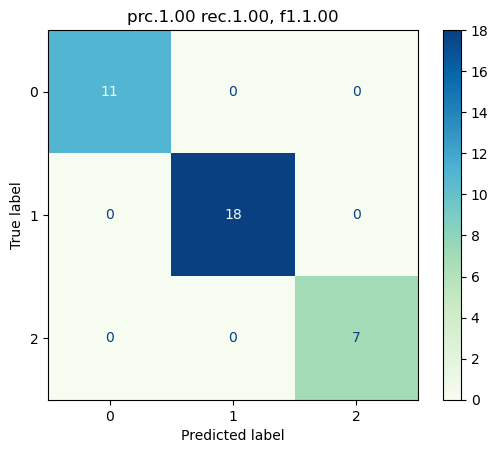

In [17]:
nb_cm = confusion_matrix(result.target, result.predicted)
ConfusionMatrixDisplay(nb_cm).plot(cmap = 'GnBu')
prc, rec, f1, _ = precision_recall_fscore_support(result.target, result.predicted, average = 'macro')
plt.title('prc.%4.2f rec.%4.2f, f1.%4.2f' %(prc, rec, f1));